# Title

Author

Scope of the Capstone
Exploratory data analysis of Windows-based process events

Before each section put an explanation of what the code is doing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing data here

In [5]:
columns = ['time', 'username', 'computer', 'process_name', 'start_or_stop']
df = pd.read_csv("C:\\Users\\kim\\data\\proc.txt", nrows=50000)
df.columns=columns

The data used in this capstone project is a 58 day, de-identified capture of users, computers, and processes on a network.  The data was retrieved from Windows endpoints/computers on the network and although de-identified, maintain the similar information to what can be found in normal Windows Security Event Logs.  This particular data, stop and start times for individual computer systems directly translate to Windows start and stop event IDs: 4688 and 4689.  These represent granular workstation activity and can be used to identify what happens on the workstation after the user has logged in. The data was made available from Los Alamos National Laboratory, and can be retrieved here:
https://csr.lanl.gov/data/cyber1/

A. D. Kent, “Comprehensive, Multi-Source Cybersecurity Events,” Los Alamos National Laboratory, http://dx.doi.org/10.17021/1179829, 2015.

@Misc{kent-2015-cyberdata1,
  author =     {Alexander D. Kent},
  title =      {{Comprehensive, Multi-Source Cyber-Security Events}},
  year =       {2015},
  howpublished = {Los Alamos National Laboratory},
  doi = {10.17021/1179829}
}

The data will have the format of: 
"time,user@domain,computer,process name,start/end" and represents a process event at the given time. Time starts at epoch 1 and increments at 1 second.  

When a new process is started on a workstation for the first time, it's a significant event.  This could indicate malware, Advanced persistant threats (APTs), or unauthorized changes to a system.

### Examining Features of the Data Set

In [12]:
print("Total Number of Users: ", df['username'].nunique())
print("Maximum records for a user in the data: ", df['username'].value_counts().max())
print("User that was the most active: ", df['username'].mode()[0]) 

Total Number of Users:  3008
Maximum records for a user in the data:  1637
User that was the most active:  C1685$@DOM1


In [7]:
print("Total Number of Computers: ", df['computer'].nunique())
print("Maximum number of records for computer: ", df['computer'].value_counts().max())
print("Computer that was seen most frequently: ", df['computer'].mode()[0])

Total Number of Computers:  2471
Number of times the highest computer was seen in the data:  1637
Computer that was seen most frequently:  0    C1685
dtype: object


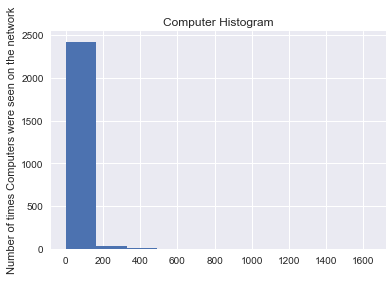

In [8]:
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'])
plt.title('Computer Histogram')
plt.ylabel('Number of times Computers were seen on the network')

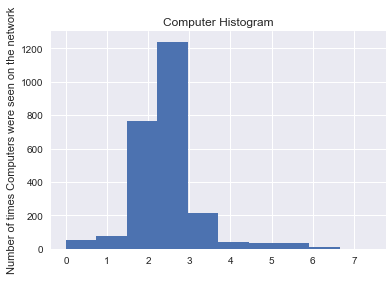

In [13]:
#plot computers_df in logscale
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'].apply(np.log))
plt.title('Computer Histogram')
plt.ylabel('Number of times Computers were seen on the network')
#add in logscale to the lable add sentence why we would do that 
# it is easier for models and visualizations to work 

In [15]:
print("Total Number of Unique Processes: ", df['process_name'].nunique())
print("Process that was seen most frequently: ", df['process_name'].mode()[0])
print("The most frequenty seen process was seen this many times: ", df['process_name'].value_counts().max())
# add in the percentage of this process

Total Number of Unique Processes:  311
The most frequenty seen process was seen this many times:  10299
Process that was seen most frequently:  P16


In [16]:
process_df = df['process_name'].value_counts()
process_df.describe([])

count      311.000000
mean       160.771704
std        763.610838
min          1.000000
25%          2.000000
50%          6.000000
75%         31.000000
max      10299.000000
Name: process_name, dtype: float64

The describe method from pandas gives us some interesting information about the data.  Most of the computers have less than 32 processes running on them for the given time period.  The most unique processes were only seen once during the time period. 

In [ ]:
plt.hist(process_df)
plt.title('Process Histogram')
plt.ylabel('Number of Process')

In [ ]:
print("Latest Time seen in data: ", df['time'].max())
print("Earlieset Time seen in data: ", df['time'].min())

In [ ]:
print("Total number of start and stop events: ")
df['start_or_stop'].value_counts()

In [ ]:
avg_u = df.groupby(['username'])['computer'].nunique()
print("Average number of computers per user: ")
avg_u_mean = avg_u.mean()
print(avg_u_mean)
print("Maximum number of computers used by a user")
avg_u_max = avg_u.max()
print(avg_u_max)

In [ ]:
#Did I do this right????

avg_p = df.groupby(['username','computer'])['process_name'].value_counts()
avg_p

If we had seen a maximum number closer to the total number of computers in the environment, this could indicate a brute force attack (possibly) against the environment.

In [ ]:
df_grouped = df.groupby(['username','computer','process_name'])['username'].count().to_frame()
df_grouped.columns = ['process_counts']
df_grouped
df_grouped2 = df_grouped.reset_index()
df_grouped2.head()

In [ ]:
#sns.boxplot(x = 'username', y = 'process_counts', hue='process_name', data=df_grouped2)

In [ ]:
df_byuser = df_grouped2.set_index(['username'])
df_byuser

In [ ]:
df_byuser.groupby(level=0)['process_counts'].sum().sort_values()


In [ ]:
df_byuser.loc['C1183$@DOM1']

In [ ]:
sns.barplot(x='process_name', y='process_counts', data = df_byuser.loc['C1183$@DOM1'])

To see the most used computer, or the computer where the most processes were run, we get the maximum.

Let's plot this.

In [ ]:
cdf= df.groupby('username')['computer'].value_counts()
cdf


In [ ]:
df['z_score'] = df.groupby('computer')['process_name'].apply(lambda x: (x - x.mean())/x.std())

In [ ]:
num_com = df.groupby('username')['computer'].count()
num_com

To find the most active user, we get the total of all of the users.

In [ ]:
sns.distplot(num_com, color='r', axlabel='Number of Computer Used')

In [ ]:
df['computer'].count()

In [ ]:
df['username'].count()

In [ ]:
df['process_name'].nunique()

In [ ]:
df[df['username']=='C1183$@DOM1']